<a href="https://colab.research.google.com/github/Palak-bindal/Bike-Sharing-Demand-Prediction-/blob/main/Colab_Bike_Sharing_Count_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** - Palak Bindal
##### **Team Member 2 -** - Vashu Garg
##### **Team Member 3 -** - Deepika Gupta
##### **Team Member 4 -** - Somya Jain
##### **Team Member 5 -** - Jyoti Singh


# **Project Summary -**

 First we do Exploratory Data Analysis on the data set. We look for missing data values,duplicates values (none were found) and outliers and appropriately modify them. we have seen relation b/w numeric features and dependent variables and seen seasonwise and weekdays- weekend monthly distribution of rented bike count. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering to modify few existing columns and drop out irrelavant ones.we have seen skewness in data set  and to remove skewness we have used square root transforming.

We then look at several popular individual models from simple ones like Linear Regressor and Regularization Models (Ridge and Lasso) to more complicated ensemble ones like Decision Tree, Random Forest, XG Boost and Light GBM. 


# **GitHub Link -**

https://github.com/Palak-bindal/Bike-Sharing-Demand-Prediction-







# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [232]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [233]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
# Importing the dataset
rental_bike_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone ML- Bike sharing demand prediction/SeoulBikeData.csv',encoding='ISO-8859-1')

### Dataset First View

In [235]:
# Dataset First Look
rental_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [236]:
rental_bike_df.shape

(8760, 14)

In [237]:
rental_bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Dataset Rows & Columns count

In [238]:
# Dataset Rows & Columns count
rental_bike_df.shape

(8760, 14)

### Dataset Information

In [239]:
# Dataset Info
rental_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [240]:
# Dataset Duplicate Value Count
len(rental_bike_df[rental_bike_df.duplicated()])

0

#### Missing Values/Null Values

In [241]:
# Missing Values/Null Values Count
rental_bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

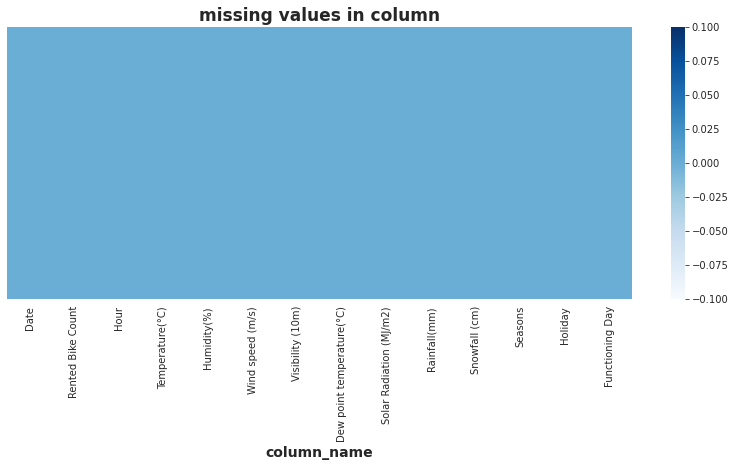

In [242]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(rental_bike_df.isnull(), cbar=True, yticklabels=False,cmap="Blues")
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

## What did you know about your dataset?

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
### Attribute Information:
* ### **Date** : year-month-day
* ### **Rented Bike count:** Count of bikes rented at each hour
* ### **Hour** - Hour of the day
* ### **Temperature:**Temperature in Celsius
* ### **Humidity:**-%
* ### **Windspeed :**-m/s
* ### **Visibility:**-10m
* ### **Dew point temperature:**-Celsius
* ### **Solar radiation :**-MJ/m2
* ### **Rainfall:**-mm
* ### **Snowfall :**-cm
* ### **Seasons :**- Winter, Spring, Summer, Autumn
* ### **Holiday :**- Holiday/No holiday
* ### **Functional Day :**-- NoFunc(Non Functional Hours), Fun(Functional hours)

## ***2. Understanding Your Variables***

In [243]:
# Dataset Columns
rental_bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [244]:
# Dataset Describe
rental_bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

we get to know about our data is:

*   Four features are of integer data types.
*   Six features are of float data types.
*   Four features are of object data types.
*   Also there are no null values.

### Check Unique Values for each variable.

In [245]:
# Check Unique Values for each variable.
for i in ['Seasons','Holiday','Functioning Day']:
  print(rental_bike_df[i].value_counts())

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64


## 3. ***Data Wrangling***

**Exploratory Data Analysis**

In [246]:
# Numeric Features

numeric_features = rental_bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [247]:
# creating a dataframe containing the sum of all column values pertaining to differant seasons

df_1 = rental_bike_df.groupby('Seasons').sum()
df_1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Seasons,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6


 ## ****4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables****

 # Chart 1-Pie chart of bike count in differant seasons

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f55ac26a550>],
      dtype=object)

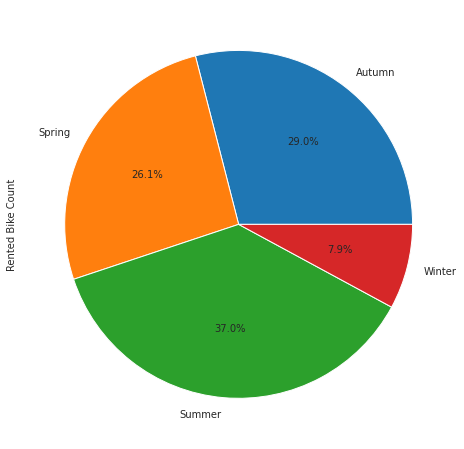

In [248]:
# creating a pie chart of bike count in differant seasons

df_1['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8), autopct = "%1.1f%%")


conclusions from above pie chart:

 Most bikes have been rented in the summer season.
least bike rent count is in winter season.
autumn and spring seasons have almost equal amounts of bike rent count.


In [249]:
# Working on Categorical features
# Date columns to Date format conversion
rental_bike_df['Date']= pd.to_datetime(rental_bike_df['Date'])


In [250]:
# creating a column containing the year from a particular date

year = []
for i in range(len(rental_bike_df['Date'])):
  year.append(rental_bike_df['Date'][i].year)
rental_bike_df['year'] = year  


In [251]:
# creating a series which shows total number of bikes rented in each year

df_year = rental_bike_df.groupby('year').sum()['Rented Bike Count']
df_year

year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

# Chart 2- Comparison of No. of bikes rented in Years 2017 & 2018

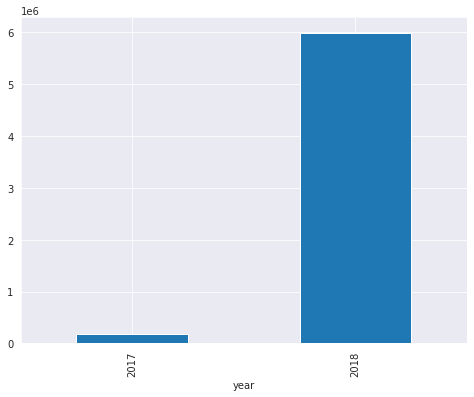

In [252]:
fig, ax = plt.subplots(figsize=(8,6))
df_year.plot(kind='bar', ax=ax)




Above plot shows that most of the bikes have been rented in the year 2018.



In [253]:
# creating a series which shows total number of bikes rented on the type of day

df_hol = rental_bike_df.groupby('Holiday').sum()
df_hol

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year
Holiday,,,,,,,,,,,
Holiday,215895,4968,4298.3,23212,790.4,657366,106.2,237.49,33.7,22.0,871680
No Holiday,5956419,95772,108556.1,486850,14319.8,11929228,35580.4,4747.92,1268.8,635.6,16805256


# Chart 3- Bikes rented in Working and Non-working days

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f55b3122c10>],
      dtype=object)

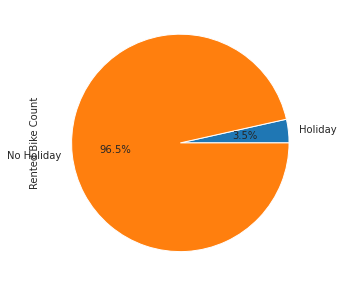

In [254]:
df_hol['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(5, 5) ,autopct = "%1.1f%%" )

Above plot shows that most of the bikes have been rented on working days.



# Chart 4- Comparison of Bike rented on Holiday/No Holidays in both the years

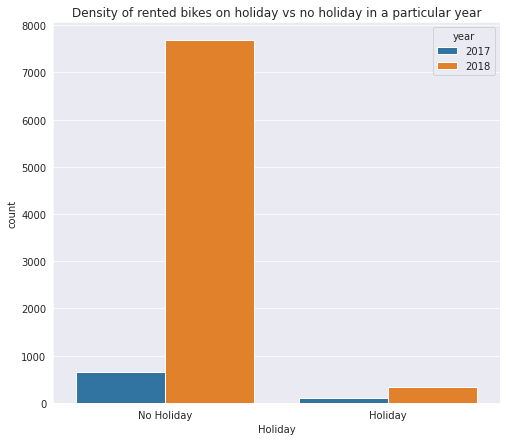

In [255]:
# bikes rented on type of day in each year

plt.figure(figsize=(8,7))
sns.countplot(x='Holiday', hue = 'year', data= rental_bike_df)
plt.title('Density of rented bikes on holiday vs no holiday in a particular year')
plt.show()


In [256]:
# extracting day,month, day of week and weekdays/weekend from date column
rental_bike_df['month'] = rental_bike_df['Date'].apply(lambda x : x.month)
rental_bike_df['day_of_week'] = rental_bike_df['Date'].dt.day_name()
rental_bike_df['weekdays_weekend']=rental_bike_df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
#rental_bike_df=rental_bike_df.drop(columns=['Date','day_of_week'],axis=1)


In [257]:
rental_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day_of_week,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0


## Chart 5- No. of Bikes rented monthwise in 2018

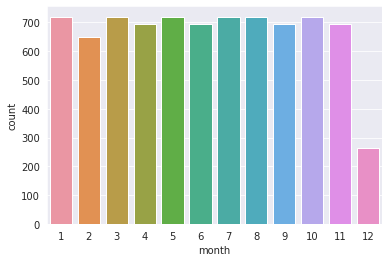

In [258]:
# plot showing the bikes rented in differant months in the year 2018

sns.countplot(rental_bike_df.loc[rental_bike_df['year']==2018,'month'])


 Above plot shows that very less bikes have been rented in december which is winter season.



In [259]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_rain = pd.DataFrame(rental_bike_df.groupby('Rainfall(mm)')['Rented Bike Count'].sum())


In [260]:
# resetting index of the dataframe

df_rain.reset_index(inplace=True)
df_rain.head()


,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


# Chart 6- Distribution of bikes rented as per Rainfall 

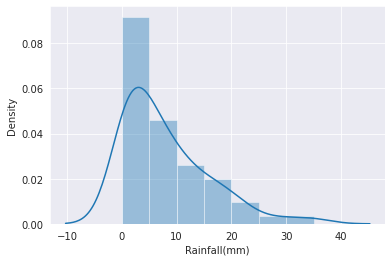

In [261]:
# plot showing distribution of bike rentals according to rainfall intensity

sns.distplot(df_rain['Rainfall(mm)'])


Above plot shows that people tend to rent bikes when there is no or less rainfall.



In [262]:
# creating a dataframe containing the count of bikes rented in differant intensities of snowfall

df_snow = pd.DataFrame(rental_bike_df.groupby('Snowfall (cm)')['Rented Bike Count'].sum())
df_snow.reset_index(inplace=True)


In [263]:
df_snow.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


# Chart 7- Distribution of Bikes Rented as per Snowfall

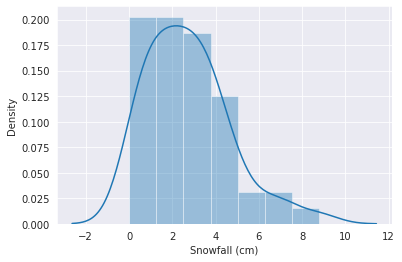

In [264]:
# plot showing distribution of bike rentals according to snowfall intensity

sns.distplot(df_snow['Snowfall (cm)'])

Above plot shows that people tend to rent bikes when there is no or less snowfall.



In [265]:
# creating a dataframe containing the count of bikes rented in differant intensities of tempreature

df_temp = pd.DataFrame(rental_bike_df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)
df_temp.head()


,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


## Chart 8- Distribution of Bikes rented as per Temperature

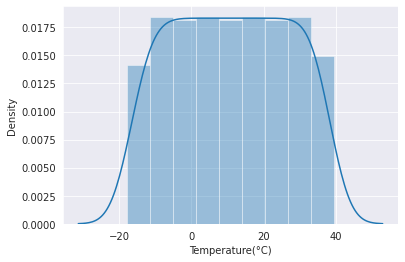

In [266]:
# plot showing distribution of bike rentals according to temperature intensity

sns.distplot(df_temp['Temperature(°C)'])


Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.



In [267]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

df_visibility = pd.DataFrame(rental_bike_df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visibility.reset_index(inplace=True)
df_visibility.head()

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65


## Chart 9- Distribution of Bikes rented as per Visibility

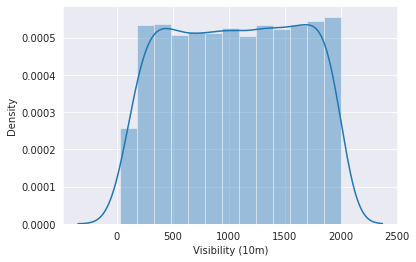

In [268]:
sns.distplot(df_visibility['Visibility (10m)'])

Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.


In [269]:
# creating a dataframe containing the count of bikes rented in differant intensities of humidity

df_humidity = pd.DataFrame(rental_bike_df.groupby('Humidity(%)')['Rented Bike Count'].sum())
df_humidity.reset_index(inplace=True)
df_humidity.head()

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353


## Chart 10- Distribution of Bikes rented in Humidity

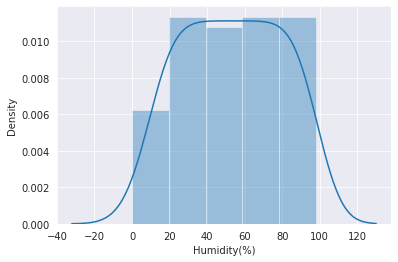

In [270]:
sns.distplot(df_humidity['Humidity(%)'])


## Chart 11- Scatter plot of Bikes rented hourwise

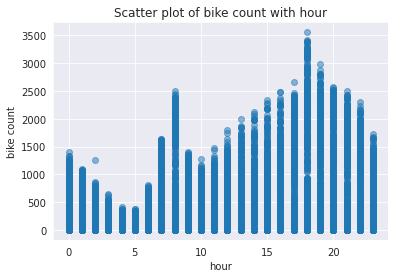

In [271]:
# scatter plot of bike count at hour of a particular day

plt.scatter(rental_bike_df['Hour'], rental_bike_df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()


 From above its clear that the rentals were more in the morning and evening.This is because people not having personal vehicle, commuting to offices and schools tend to rent bikes.



## Chart 12- Sub plots
1. Average Bike Rentals by the day if Working day or Not
2. Average Bike Rentals by the day across Weekdays

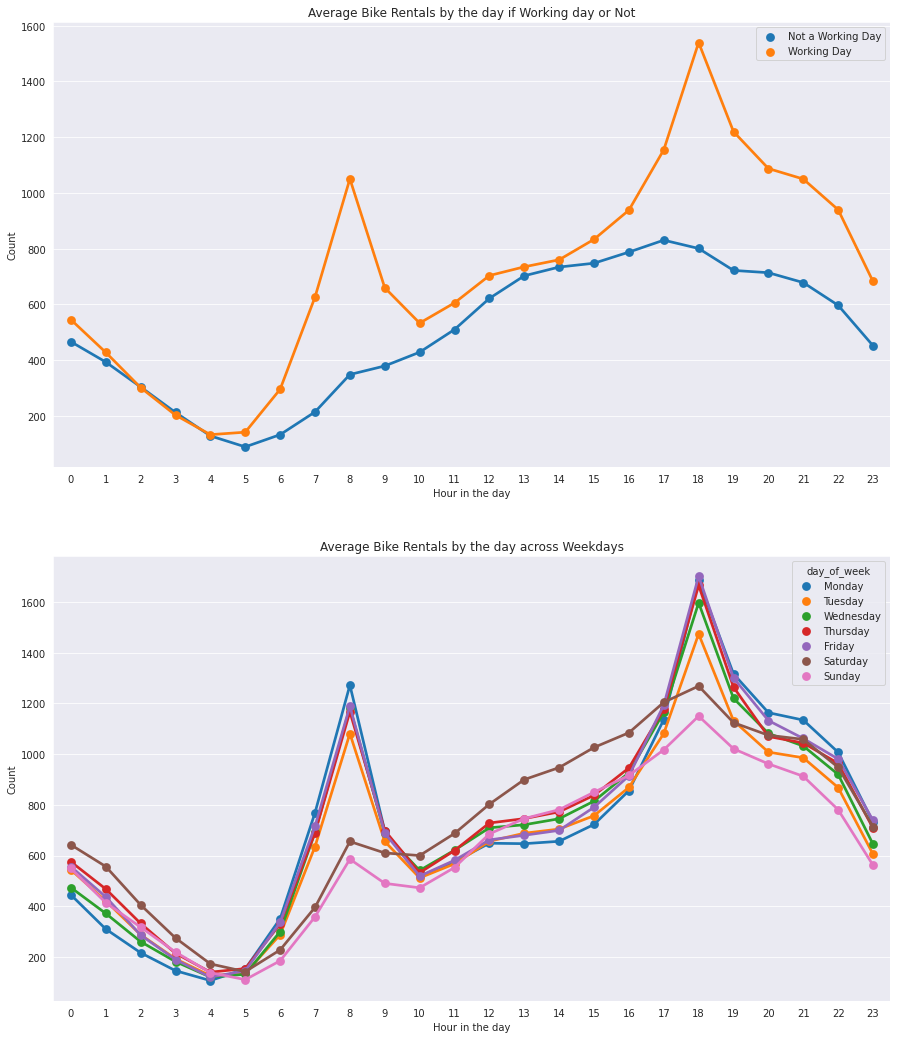

In [272]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(rental_bike_df.groupby(['Holiday', 'Hour'])['Rented Bike Count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='Hour', y='Rented Bike Count', hue='Holiday', ax=axes[0], legend=True)
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day if Working day or Not')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(rental_bike_df.groupby(['day_of_week', 'Hour'])['Rented Bike Count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='Hour', y='Rented Bike Count', hue='day_of_week', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Weekdays')



plt.show()



# Chart 13 - Scatter plots of Numerical Features with Target Variable

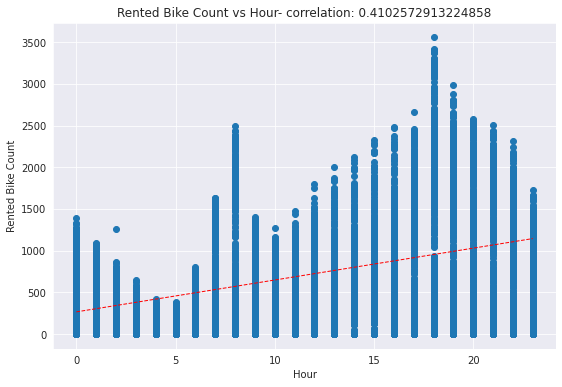

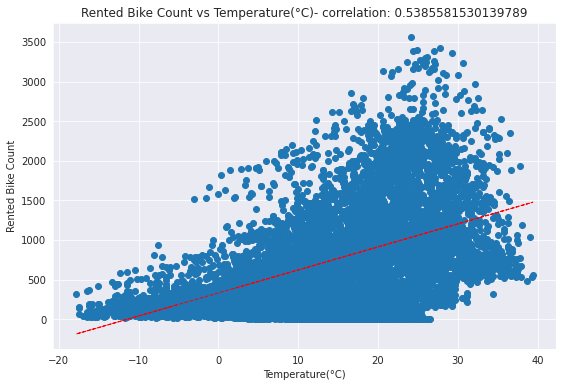

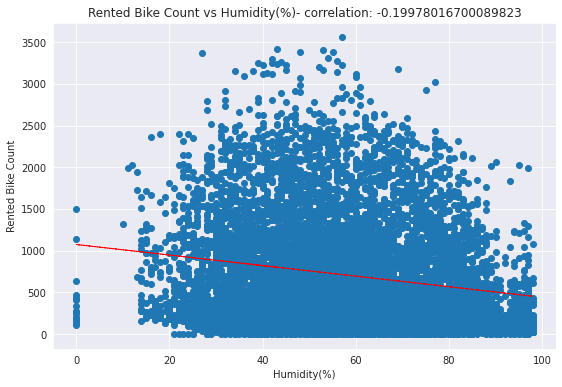

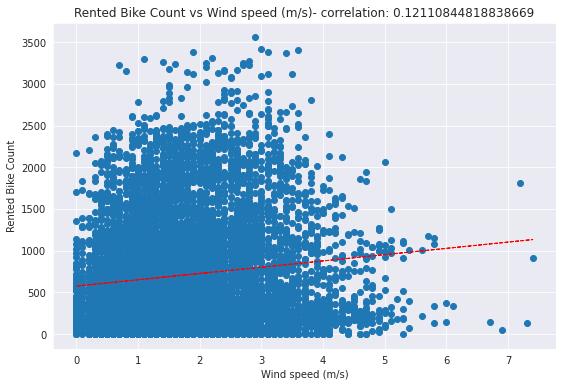

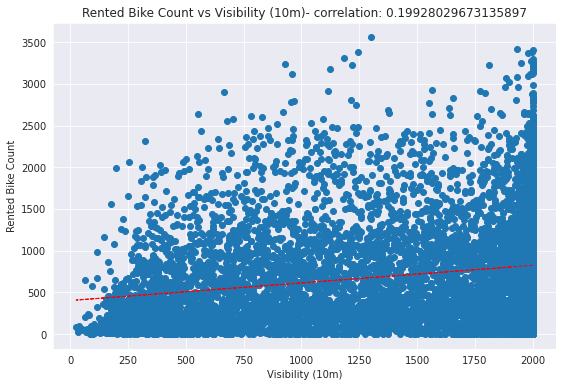

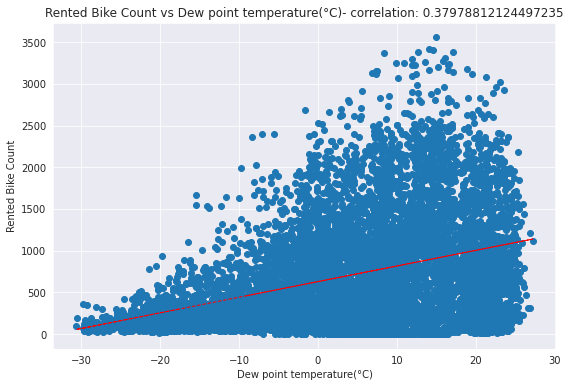

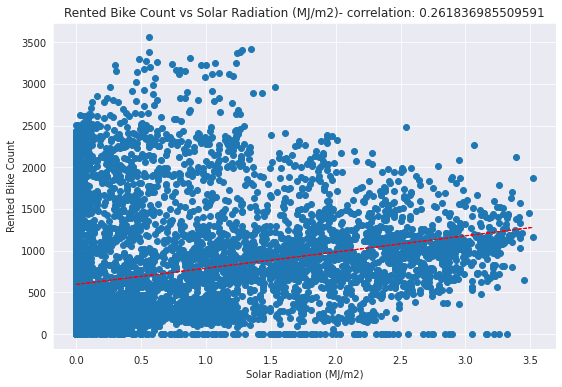

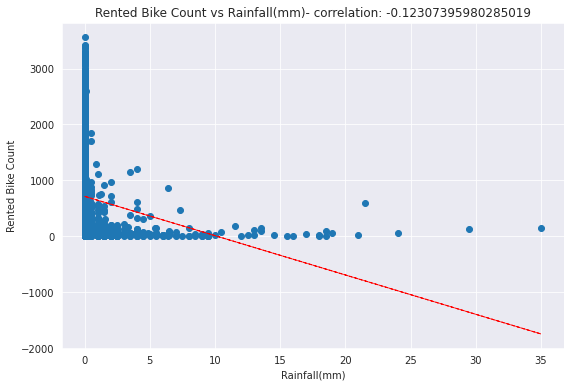

In [273]:
## plot for each numerical feature count (except Date & Rented Bike Count)
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = rental_bike_df[col]
    label = rental_bike_df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(rental_bike_df[col], rental_bike_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(rental_bike_df[col])

    plt.plot(rental_bike_df[col], y_hat, "r--", lw=1)

plt.show()

In [274]:
#checking categorical variable
categorical_features = rental_bike_df.describe(include=['object','category']).columns

In [275]:
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'day_of_week'], dtype='object')

## Chart 14- Distribution of Categorical Features

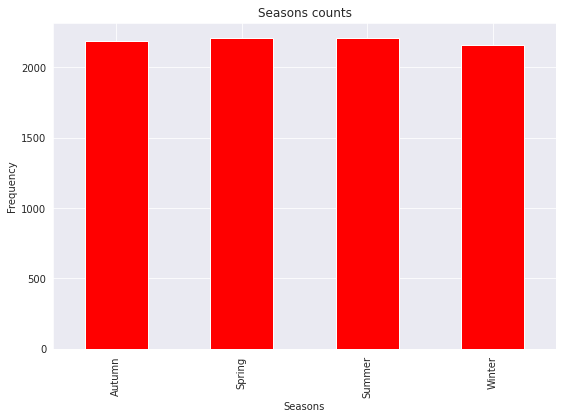

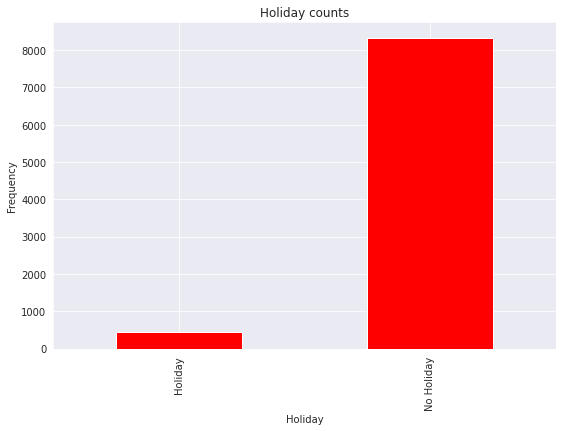

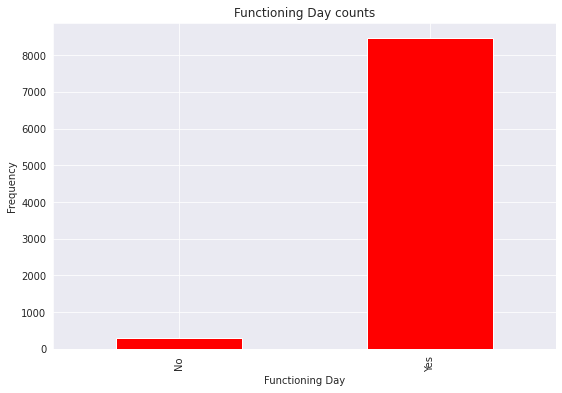

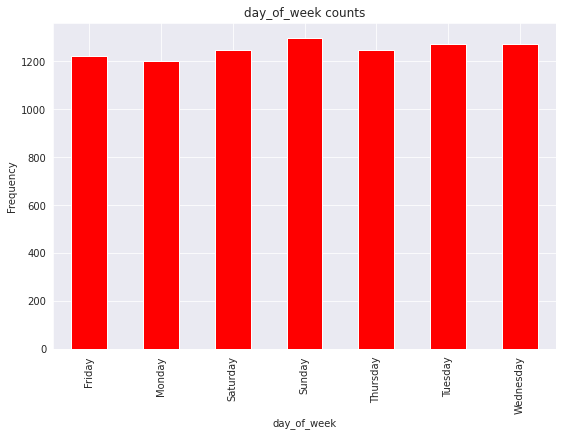

In [276]:
# plot a bar plot for each categorical feature count  

for col in categorical_features:
    counts = rental_bike_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='red')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

## Chart 15 - Bivariate Analysis 

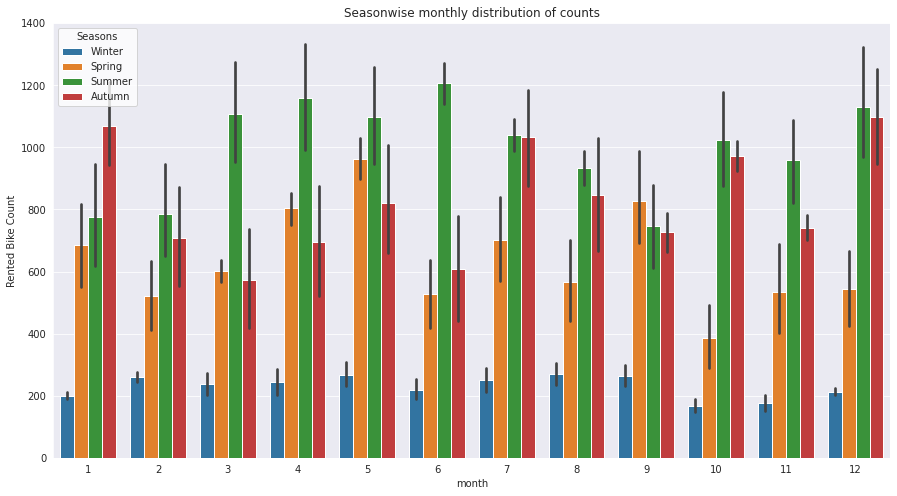

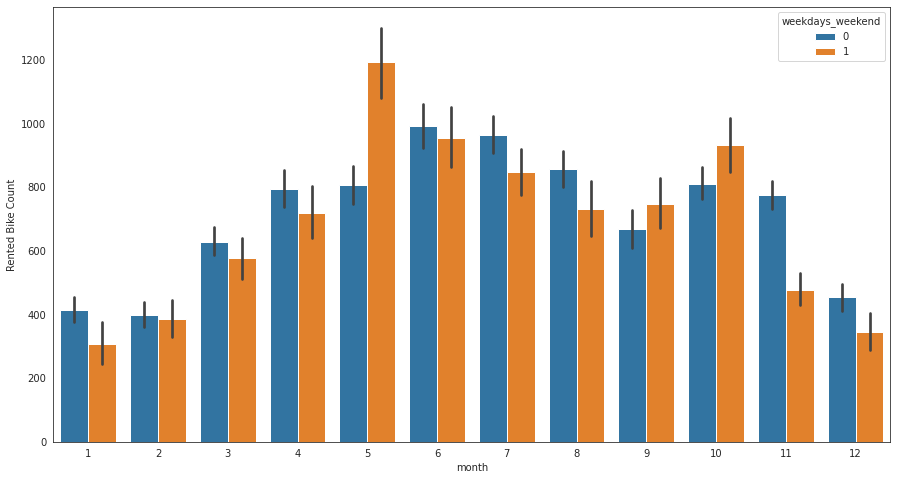

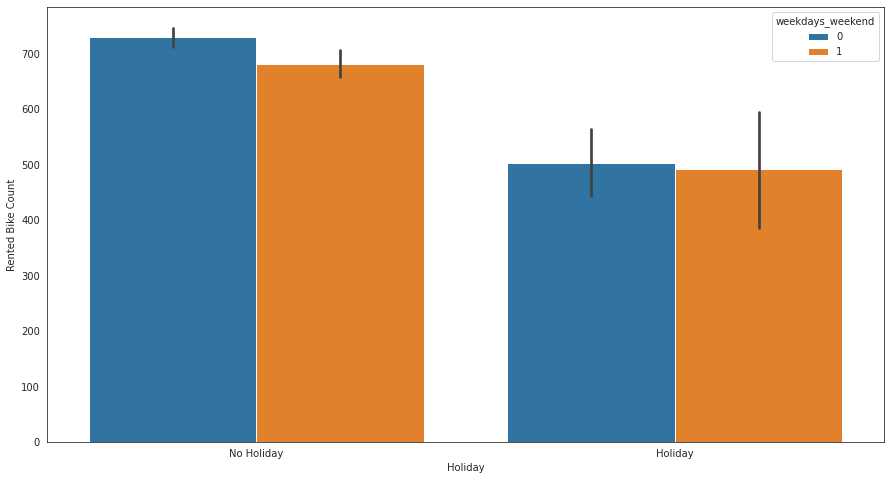

In [277]:
#relation between categoricals and dependent features
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='Rented Bike Count',data=rental_bike_df[['month','Rented Bike Count','Seasons']],hue='Seasons',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='Rented Bike Count',data=rental_bike_df[['month','Rented Bike Count','weekdays_weekend']],hue='weekdays_weekend',ax=ax1)
ax.set_title('Weekdays wise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='Holiday',y='Rented Bike Count',data=rental_bike_df[['Holiday','Rented Bike Count','weekdays_weekend']],hue='weekdays_weekend',ax=ax1)
ax.set_title('Holiday wise monthly distribution of counts')
plt.show()

## **5. Correlation:**

## Chart 16- Correlation Heatmap

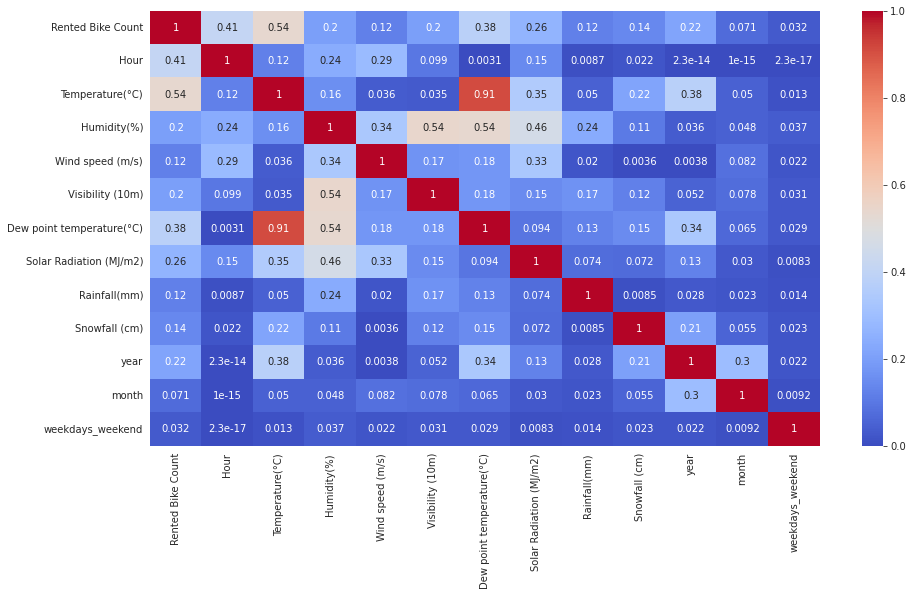

In [278]:
## Correlation 
plt.figure(figsize=(15,8))
correlation = rental_bike_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

This shows that there is high correlation between Dew point temperature and Temperature. Also the realtion of humidity with Dew point temperature and visibility.

In [279]:
# To remove Multicollinearity, using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [280]:
#removing Dew point temperature so that the high correlation can be treated.
calc_vif(rental_bike_df[[i for i in rental_bike_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','year'] ]])

,variables,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,month,4.580307
9,weekdays_weekend,1.399708


# Chart 17- Box plots for Outlier detection in Categorical features

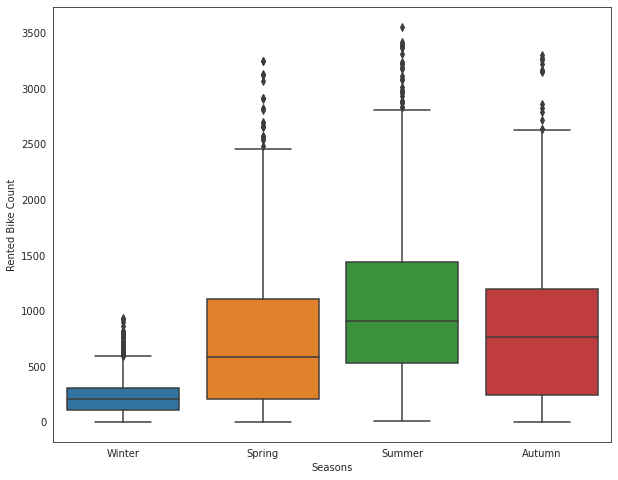

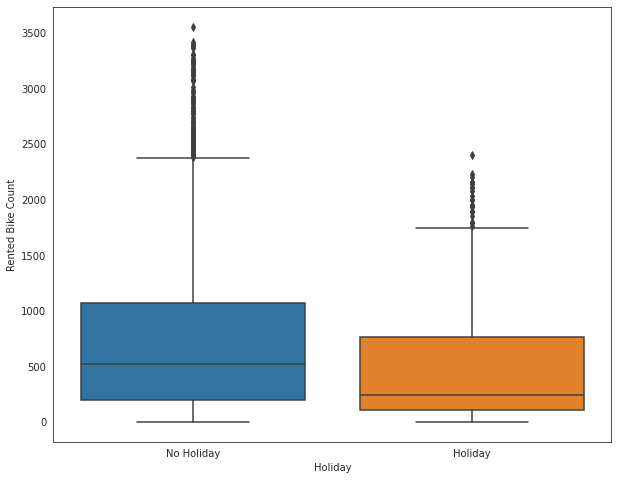

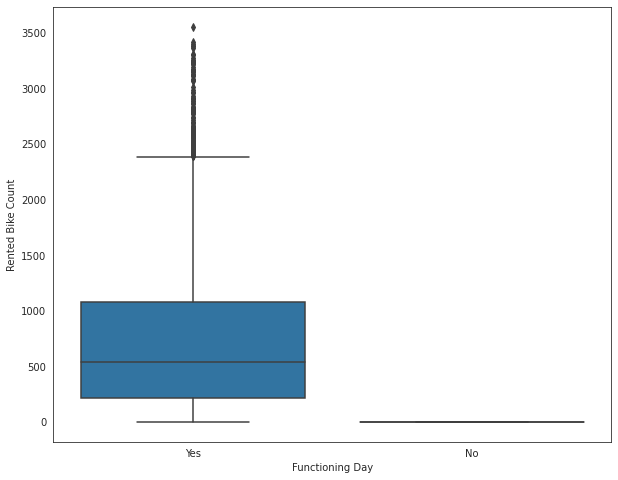

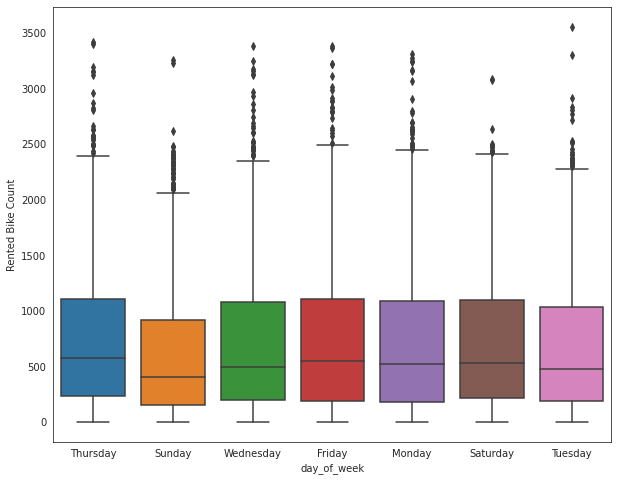

In [281]:
# showing relation between Categorical and Dependent Features
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=rental_bike_df[col],y=rental_bike_df["Rented Bike Count"])
  plt.show()

In [282]:
#treating outliers
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    rental_bike_df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return rental_bike_df

In [283]:
df_outlier_removed_SR=remove_outlier_IQR(rental_bike_df["Solar Radiation (MJ/m2)"])
df_outlier_removed_WS=remove_outlier_IQR(rental_bike_df["Wind speed (m/s)"])

df_outlier_removed_SR=pd.DataFrame(df_outlier_removed_SR)
df_outlier_removed_WS=pd.DataFrame(df_outlier_removed_WS)

ind_diff_SR=rental_bike_df.index.difference(df_outlier_removed_SR.index)
ind_diff_WS=rental_bike_df.index.difference(df_outlier_removed_WS.index)

in_first = set(ind_diff_SR)
in_second = set(ind_diff_WS)
result = in_second.union(in_first) 


for i in range(0, len(result),1):
        rental_bike_df.drop(i,inplace=True)

In [284]:
rental_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7989 entries, 771 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7989 non-null   datetime64[ns]
 1   Rented Bike Count          7989 non-null   int64         
 2   Hour                       7989 non-null   int64         
 3   Temperature(°C)            7989 non-null   float64       
 4   Humidity(%)                7989 non-null   int64         
 5   Wind speed (m/s)           7989 non-null   float64       
 6   Visibility (10m)           7989 non-null   int64         
 7   Dew point temperature(°C)  7989 non-null   float64       
 8   Solar Radiation (MJ/m2)    7989 non-null   float64       
 9   Rainfall(mm)               7989 non-null   float64       
 10  Snowfall (cm)              7989 non-null   float64       
 11  Seasons                    7989 non-null   object        
 12  Holi

## ***6. Feature Engineering & Data Pre-processing***




## Checking if Target variable is normally distributed 

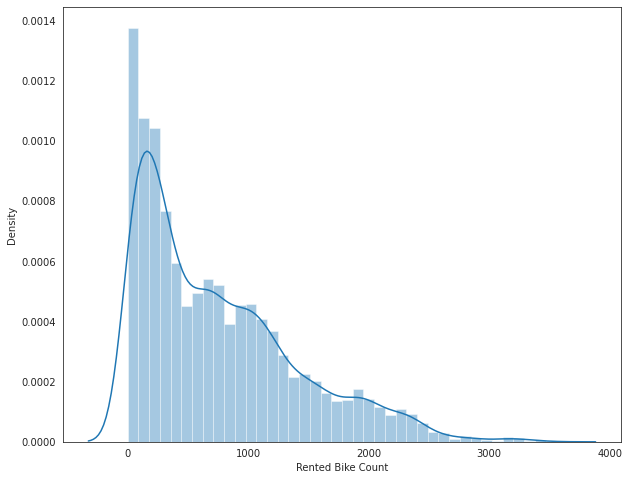

In [285]:
#visualising distribution
plt.figure(figsize=(10,8))

sns.distplot(rental_bike_df['Rented Bike Count'])

We can see that the data is rightly skewed. So applying transformation to make it normal.

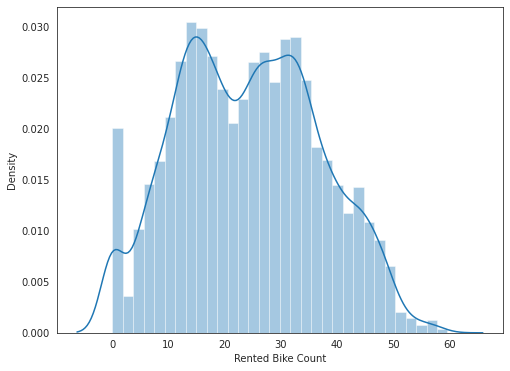

In [286]:
# square_root transformation

plt.figure(figsize=(8,6))
sns.distplot(np.sqrt(rental_bike_df['Rented Bike Count']))


In [287]:
rental_bike_df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    1389
Name: Seasons, dtype: int64

## Feature Encoding & One-hot Encoding

In [288]:
# Create dummy variables for the catgeorical variable Seasons,Holiday,Functioning Day

rental_bike_df['Winter_Season'] = np.where(rental_bike_df['Seasons']=='Winter', 1, 0)
rental_bike_df['Spring_Season'] = np.where(rental_bike_df['Seasons']=='Spring', 1, 0)
rental_bike_df['Summer_Season'] = np.where(rental_bike_df['Seasons']=='Summer', 1, 0)
rental_bike_df['Autumn_Season'] = np.where(rental_bike_df['Seasons']=='Autumn', 1, 0)
rental_bike_df['Holiday'] = np.where(rental_bike_df['Holiday']=='No Holiday', 1, 0)
rental_bike_df['Functioning Day'] = np.where(rental_bike_df['Functioning Day']=='Yes', 1, 0)

# Drop the original column Seasons from the dataframe
rental_bike_df.drop(columns=['Seasons'],axis=1,inplace=True)


In [289]:
rental_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Holiday,Functioning Day,year,month,day_of_week,weekdays_weekend,Winter_Season,Spring_Season,Summer_Season,Autumn_Season
771,2018-02-01,41,3,-2.5,62,0.4,1626,-8.7,0.0,0.0,...,1,1,2018,2,Thursday,0,1,0,0,0
772,2018-02-01,31,4,-2.7,67,0.5,1302,-7.9,0.0,0.0,...,1,1,2018,2,Thursday,0,1,0,0,0
773,2018-02-01,58,5,-3.1,67,0.6,1384,-8.3,0.0,0.0,...,1,1,2018,2,Thursday,0,1,0,0,0
774,2018-02-01,139,6,-3.2,67,0.4,1409,-8.4,0.0,0.0,...,1,1,2018,2,Thursday,0,1,0,0,0
775,2018-02-01,344,7,-3.2,69,0.5,1249,-8.0,0.0,0.0,...,1,1,2018,2,Thursday,0,1,0,0,0


In [290]:
# drop the date column in dataset
rental_bike_df=rental_bike_df.drop(columns=['Date','day_of_week'],axis=1)


## ***7. ML Model Implementation***

### **Model 1- Linear Regression**

In [291]:
#creating list of matrix to store the evaluation matrix of all model
MSE=[]
RMSE=[]
R2=[]
Adj_R2=[]


In [292]:
# ML Model - 1 Implementation
dependent_variable = 'Rented Bike Count'

In [293]:
# Create a list of independent variables
independent_variables = list(set(rental_bike_df.columns.tolist()) - {dependent_variable})
independent_variables

['Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Functioning Day',
 'Humidity(%)',
 'weekdays_weekend',
 'Wind speed (m/s)',
 'Holiday',
 'Visibility (10m)',
 'year',
 'Snowfall (cm)',
 'Spring_Season',
 'Winter_Season',
 'month',
 'Dew point temperature(°C)',
 'Temperature(°C)',
 'Summer_Season',
 'Hour',
 'Autumn_Season']

In [294]:
# Create the data of independent variables
X = rental_bike_df[independent_variables].values

# Create the dependent variable data
y = rental_bike_df[dependent_variable].values

In [295]:
rental_bike_df[independent_variables]

,Solar Radiation (MJ/m2),Rainfall(mm),Functioning Day,Humidity(%),weekdays_weekend,Wind speed (m/s),Holiday,Visibility (10m),year,Snowfall (cm),Spring_Season,Winter_Season,month,Dew point temperature(°C),Temperature(°C),Summer_Season,Hour,Autumn_Season
771,0.0,0.0,1,62,0,0.4,1,1626,2018,0.0,0,1,2,-8.7,-2.5,0,3,0
772,0.0,0.0,1,67,0,0.5,1,1302,2018,0.0,0,1,2,-7.9,-2.7,0,4,0
773,0.0,0.0,1,67,0,0.6,1,1384,2018,0.0,0,1,2,-8.3,-3.1,0,5,0
774,0.0,0.0,1,67,0,0.4,1,1409,2018,0.0,0,1,2,-8.4,-3.2,0,6,0
775,0.0,0.0,1,69,0,0.5,1,1249,2018,0.0,0,1,2,-8.0,-3.2,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,0.0,1,34,0,2.6,1,1894,2018,0.0,0,0,11,-10.3,4.2,0,19,1
8756,0.0,0.0,1,37,0,2.3,1,2000,2018,0.0,0,0,11,-9.9,3.4,0,20,1
8757,0.0,0.0,1,39,0,0.3,1,1968,2018,0.0,0,0,11,-9.9,2.6,0,21,1
8758,0.0,0.0,1,41,0,1.0,1,1859,2018,0.0,0,0,11,-9.8,2.1,0,22,1


In [296]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [297]:
X_train[0:5]

array([[ 0.000e+00,  1.500e+00,  1.000e+00,  9.600e+01,  0.000e+00,
         2.000e-01,  1.000e+00,  9.910e+02,  2.018e+03,  0.000e+00,
         0.000e+00,  0.000e+00,  8.000e+00,  2.320e+01,  2.390e+01,
         1.000e+00,  1.800e+01,  0.000e+00],
       [ 2.020e+00,  0.000e+00,  1.000e+00,  5.300e+01,  1.000e+00,
         3.700e+00,  1.000e+00,  1.974e+03,  2.018e+03,  0.000e+00,
         0.000e+00,  0.000e+00,  7.000e+00,  2.070e+01,  3.150e+01,
         1.000e+00,  1.700e+01,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00,  7.600e+01,  0.000e+00,
         1.500e+00,  1.000e+00,  1.542e+03,  2.018e+03,  0.000e+00,
         0.000e+00,  0.000e+00,  7.000e+00,  2.330e+01,  2.800e+01,
         1.000e+00,  2.200e+01,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00,  4.200e+01,  1.000e+00,
         1.200e+00,  1.000e+00,  1.766e+03,  2.018e+03,  3.000e-01,
         0.000e+00,  1.000e+00,  1.000e+00, -2.500e+01, -1.500e+01,
         0.000e+00,  0.000e+00,  0.000e+00],
    

In [298]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [299]:
X_train[0:5]

array([[0.        , 0.04285714, 1.        , 0.97959184, 0.        ,
        0.02702703, 1.        , 0.48859605, 0.        , 0.        ,
        0.        , 0.        , 0.63636364, 0.93728223, 0.72902098,
        1.        , 0.7826087 , 0.        ],
       [0.57386364, 0.        , 1.        , 0.54081633, 1.        ,
        0.5       , 1.        , 0.9868221 , 0.        , 0.        ,
        0.        , 0.        , 0.54545455, 0.89372822, 0.86188811,
        1.        , 0.73913043, 0.        ],
       [0.        , 0.        , 1.        , 0.7755102 , 0.        ,
        0.2027027 , 1.        , 0.76786619, 0.        , 0.        ,
        0.        , 0.        , 0.54545455, 0.93902439, 0.8006993 ,
        1.        , 0.95652174, 0.        ],
       [0.        , 0.        , 1.        , 0.42857143, 1.        ,
        0.16216216, 1.        , 0.88139888, 0.        , 0.03409091,
        0.        , 1.        , 0.        , 0.09756098, 0.04895105,
        0.        , 0.        , 0.        ],
    

In [300]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [301]:
regressor.intercept_

7571184414840035.0

In [302]:
regressor.coef_

array([-2.79232218e+02, -1.94360086e+03,  9.05192485e+02, -1.06680800e+03,
       -5.22444036e+01,  1.47520235e+02,  1.24120149e+02,  3.32899474e+01,
        5.81154659e+11,  2.25356058e+02, -7.57118441e+15, -7.57118441e+15,
        3.23292917e+01,  5.73817320e+02,  9.67584998e+02, -7.57118441e+15,
        6.84311605e+02, -7.57118441e+15])

In [303]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([ 868., 1364., 1391., ...,  359., 1472., 1306.])

In [304]:
y_train

array([  57, 1433, 1870, ...,  222, 2268,  906])

In [305]:
# Predicting the Test set results
y_pred_test = regressor.predict(X_test)
y_pred_test

array([ 583.,  552.,  930., ...,  510., 1355., 1201.])

In [306]:
y_test

array([ 202,    0,  387, ...,  241, 1430, 2235])

In [307]:
MSE_lr = mean_squared_error(y_test, y_pred_test)
MSE.append(MSE_lr)
MSE_lr

193680.06821026283

In [308]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

445.72741501190336

In [309]:
# Test performance
RMSE_lr = math.sqrt(mean_squared_error(y_test, y_pred_test))
RMSE.append(RMSE_lr)
RMSE_lr

440.0909771970596

In [310]:
r2_score(y_train, y_pred_train)

0.5410031385197422

In [311]:
R2_lr = r2_score(y_test, y_pred_test)
R2.append(R2_lr)
R2_lr

0.545613392658347

In [312]:
adj_r2_lr =1-(1-r2_score(y_test,y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_lr)
print("Adjusted R2 : ",adj_r2_lr,'\n')

Adjusted R2 :  0.5404335579958075 



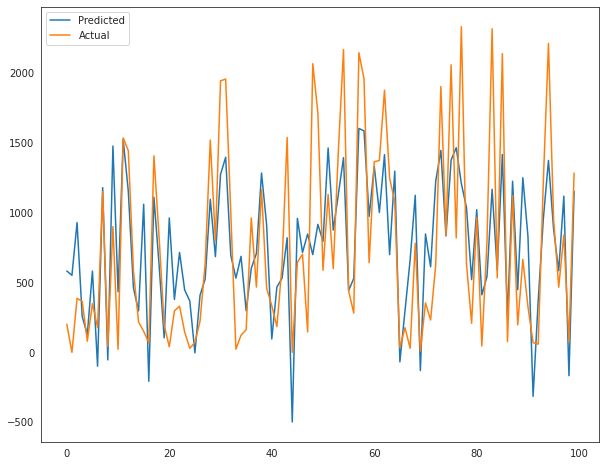

In [313]:
  plt.figure(figsize=(10,8))
  plt.plot((y_pred_test)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()


## **Model 2- Regularised Linear Regression**



## **Lasso Regression**

In [314]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [315]:
lasso.score(X_train, y_train)

0.5410269177097746

In [316]:
y_pred_testl = lasso.predict(X_test)

In [317]:
MSE_lasso = mean_squared_error(y_test, y_pred_testl)
MSE.append(MSE_lasso)

RMSE_lasso = math.sqrt(mean_squared_error(y_test, y_pred_testl))
RMSE.append(RMSE_lasso)

R2_lasso = r2_score(y_test, y_pred_testl)
R2.append(R2_lasso)

adj_r2_lasso =1-(1-r2_score(y_test,y_pred_testl))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_lasso)

print(f"MSE:{MSE_lasso},RMSE:{RMSE_lasso},R2:{R2_lasso},Adj_R2:{adj_r2_lasso}")

MSE:194069.3247190936,RMSE:440.5330007151491,R2:0.5447001704250646,Adj_R2:0.5395099253760787


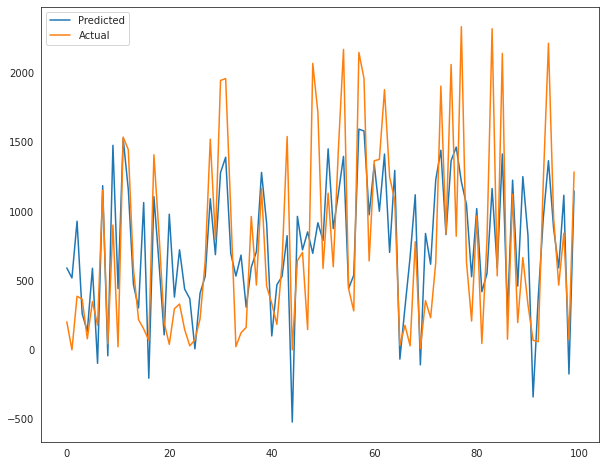

In [318]:
  plt.figure(figsize=(10,8))
  plt.plot(y_pred_testl[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()


In [319]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [320]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -199771.82678397544


In [321]:
y_pred_lasso = lasso_regressor.predict(X_test)

## **Ridge Regression**

In [322]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [323]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [324]:
ridge.score(X_train, y_train)

0.5410791116835815

In [325]:
y_pred_r = ridge.predict(X_test)

In [326]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [327]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -199748.4390593674


In [328]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [329]:
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
MSE.append(MSE_ridge)

RMSE_ridge = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
RMSE.append(RMSE_ridge)

R2_ridge = r2_score(y_test, y_pred_ridge)
R2.append(R2_ridge)

adj_r2_ridge =1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_ridge)

print(f"MSE:{MSE_ridge},RMSE:{RMSE_ridge},R2:{R2_ridge},Adj_R2:{adj_r2_ridge}")

MSE:194107.61316454146,RMSE:440.5764555267808,R2:0.5446103431290077,Adj_R2:0.5394190740829798


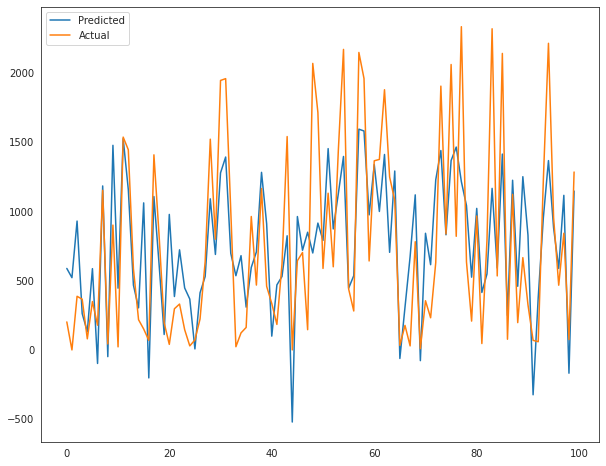

In [330]:
  plt.figure(figsize=(10,8))
  plt.plot(y_pred_ridge[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

## **Elastic net Regression**

In [331]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [332]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [333]:
elasticnet.score(X_train, y_train)

0.4491554728450623

In [334]:
y_pred_en = elasticnet.predict(X_test)

In [335]:
#cross validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [336]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [337]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -199647.4567732505


In [338]:
MSE_EN = mean_squared_error(y_test, y_pred_elastic)
MSE.append(MSE_EN)

RMSE_EN = math.sqrt(mean_squared_error(y_test, y_pred_elastic))
RMSE.append(RMSE_EN)

R2_EN = r2_score(y_test, y_pred_elastic)
R2.append(R2_EN)

adj_r2_EN =1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_EN)

print(f"MSE:{MSE_EN},RMSE:{RMSE_EN},R2:{R2_EN},Adj_R2:{adj_r2_EN}")

MSE:193937.56595064307,RMSE:440.38343060410784,R2:0.5450092854534564,Adj_R2:0.5398225641983343


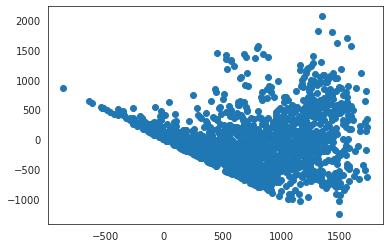

In [339]:
### Heteroscedasticity
plt.scatter((y_pred_lasso),(y_test)-(y_pred_lasso))

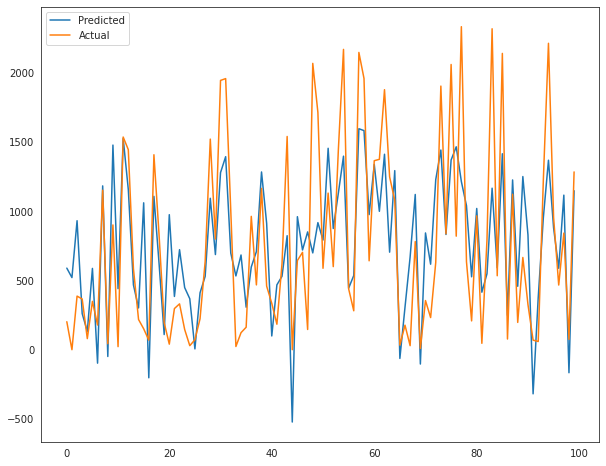

In [340]:
  plt.figure(figsize=(10,8))
  plt.plot(y_pred_elastic[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

## **Model 3- Decision Tree**

In [341]:
rental_bike_df.shape

(7989, 19)

In [342]:
from sklearn.tree import DecisionTreeRegressor

In [343]:
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=5)
gridSearch_decisionTree.fit(X_train,y_train)

decisionTree.fit(X_train,y_train)
best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,y_test)

In [344]:
y_pred_DT = gridSearch_decisionTree.predict(X_test)

In [345]:
# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.7805587064485792 with max depth 7


The best R2 test score is : 0.7679895092240214 with max depth = 7


In [346]:
MSE_DT = mean_squared_error(y_test, y_pred_DT)
MSE.append(MSE_DT)

RMSE_DT = math.sqrt(mean_squared_error(y_test, y_pred_DT))
RMSE.append(RMSE_DT)

R2_DT = r2_score(y_test, y_pred_DT)
R2.append(R2_DT)

adj_r2_DT =1-(1-r2_score(y_test,y_pred_DT))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_DT)

print(f"MSE:{MSE_DT},RMSE:{RMSE_DT},R2:{R2_DT},Adj_R2:{adj_r2_DT}")

MSE:98893.33653973843,RMSE:314.473109406414,R2:0.7679895092240214,Adj_R2:0.7653446777902231


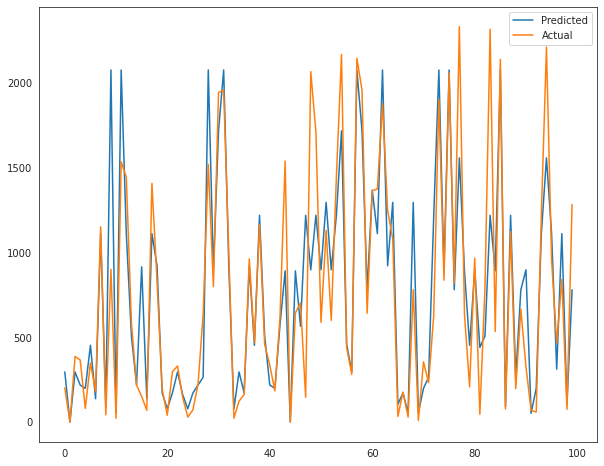

In [347]:
  plt.figure(figsize=(10,8))
  plt.plot(y_pred_DT[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [348]:
def get_features_importance (optimal_model,X_train):
  
  #shows the graph of feature importance
  
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()


## **Model 4- Random Forest**

In [349]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [350]:
Y_train_pred_RF = regressor.predict(X_train) 

Y_test_pred_RF = regressor.predict(X_test)

In [351]:
y_test

array([ 202,    0,  387, ...,  241, 1430, 2235])

In [352]:
Y_test_pred_RF

array([ 333.65,    0.  ,  331.02, ...,  293.64, 1517.39, 1830.91])

In [353]:
MSE_RF = mean_squared_error(y_test, Y_test_pred_RF)
MSE.append(MSE_RF)

RMSE_RF = math.sqrt(mean_squared_error(y_test, Y_test_pred_RF))
RMSE.append(RMSE_RF)

R2_RF = r2_score(y_test, Y_test_pred_RF)
R2.append(R2_RF)

adj_r2_RF =1-(1-r2_score(y_test,Y_test_pred_RF))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_RF)

print(f"MSE:{MSE_RF},RMSE:{RMSE_RF},R2:{R2_RF},Adj_R2:{adj_r2_RF}")

MSE:48471.56728366709,RMSE:220.16259283463003,R2:0.8862824078177856,Adj_R2:0.8849860704781529


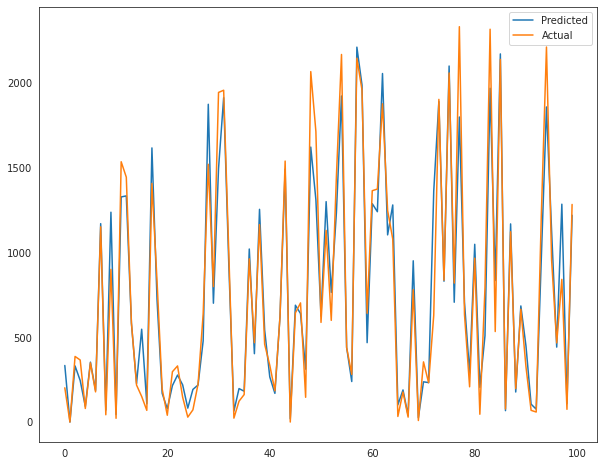

In [354]:
plt.figure(figsize=(10,8))
plt.plot(Y_test_pred_RF[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

## **Model 5- XGBoost Regression**

In [355]:
from xgboost import XGBRegressor

In [356]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[18:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [357]:
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

In [358]:
MSE_xgb = mean_squared_error(y_test, y_test_pred_xgb)
MSE.append(MSE_xgb)

RMSE_xgb = math.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
RMSE.append(RMSE_xgb)

R2_xgb = r2_score(y_test, y_test_pred_xgb)
R2.append(R2_xgb)

adj_r2_xgb =1-(1-r2_score(y_test,y_test_pred_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_xgb)

print(f"MSE:{MSE_xgb},RMSE:{RMSE_xgb},R2:{R2_xgb},Adj_R2:{adj_r2_xgb}")

MSE:67891.32674799045,RMSE:260.55964144124556,R2:0.8407223318640469,Adj_R2:0.8389066269707934


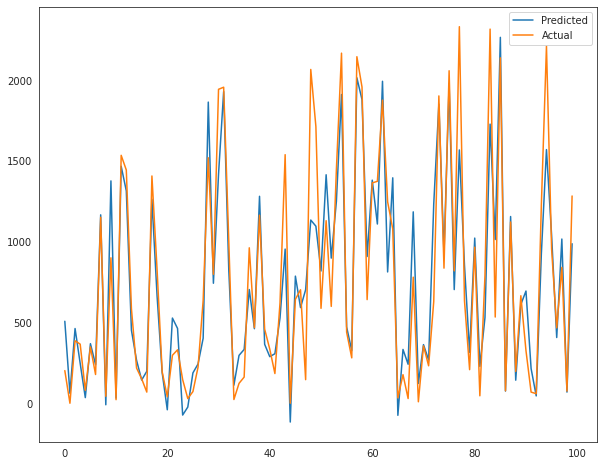

In [359]:
plt.figure(figsize=(10,8))
plt.plot(y_test_pred_xgb[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

## **Model 6- LightGBM Model**

In [360]:
import lightgbm as lgb

In [361]:
lgbr=lgb.LGBMRegressor()

In [362]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

In [363]:
lgbr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 13],
                         'n_estimators': [150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=5)

In [364]:
y_train_pred_lgbr = lgbr_grid.predict(X_train)
y_test_pred_lgbr = lgbr_grid.predict(X_test)

In [365]:
y_train_pred_lgbr

array([ 121.2797616 , 1355.31064593, 1800.07306753, ...,  309.14746165,
       2229.30608117, 1011.69574606])

In [366]:
y_test_pred_lgbr

array([ 342.93733344,  -30.10063175,  332.3361899 , ...,  272.79383626,
       1585.71070187, 2233.83080675])

In [367]:
MSE_lgbr = mean_squared_error(y_test, y_test_pred_lgbr)
MSE.append(MSE_lgbr)

RMSE_lgbr = math.sqrt(mean_squared_error(y_test, y_test_pred_lgbr))
RMSE.append(RMSE_lgbr)

R2_lgbr = r2_score(y_test, y_test_pred_lgbr)
R2.append(R2_lgbr)

adj_r2_lgbr =1-(1-r2_score(y_test,y_test_pred_lgbr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2.append(adj_r2_lgbr)

print(f"MSE:{MSE_lgbr},RMSE:{RMSE_lgbr},R2:{R2_lgbr},Adj_R2:{adj_r2_lgbr}")

MSE:39473.40230504012,RMSE:198.67914411190753,R2:0.9073927145970049,Adj_R2:0.9063370267330062


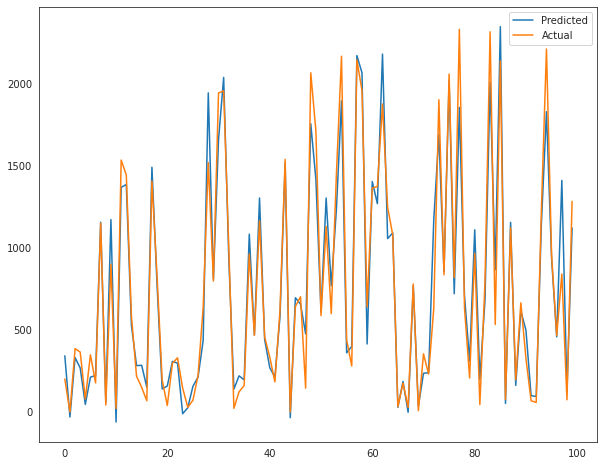

In [368]:
plt.figure(figsize=(10,8))
plt.plot(y_test_pred_lgbr[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

## **Comparison of Model Metrices**

In [369]:
all_model_matrices={'Mean_square_error':MSE,'Root_Mean_square_error':RMSE,'R2':R2,'Adjusted_R2':Adj_R2}
model_name=['Linear','Lasso','Ridge','Elasticnet','Decision_Tree','Random_Forest','xgboost','LightGBM']

matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [370]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Decision_Tree,Random_Forest,xgboost,LightGBM
Mean_square_error,193680.068210,194069.324719,194107.613165,193937.565951,98893.336540,48471.567284,67891.326748,39473.402305
Root_Mean_square_error,440.090977,440.533001,440.576456,440.383431,314.473109,220.162593,260.559641,198.679144
R2,0.545613,0.544700,0.544610,0.545009,0.767990,0.886282,0.840722,0.907393
Adjusted_R2,0.540434,0.539510,0.539419,0.539823,0.765345,0.884986,0.838907,0.906337


Among all the models created, Light GbM is giving best results- highest R2 score and lowest Root Mean Square Error.

## **Feature Importance for the selected Model**

In [371]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = pd.DataFrame(X_train).describe().columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='green', align='center')
  plt.yticks(range(len(indices)), [independent_variables[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

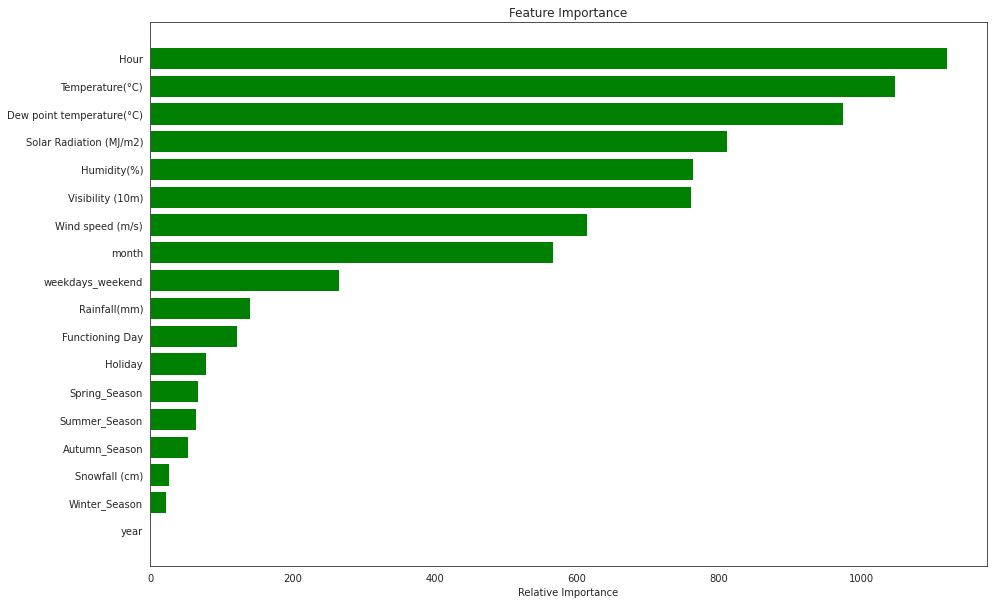

In [372]:
#getting and visualizing features importance of LightGBM model
get_features_importance(lgbr_grid.best_estimator_,X_train)

We can see from the graph that hour is the feature which is most important as per our model and impacting the target variable most.

## **Model Explainability**

# **Shap**

In [373]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [374]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

## SHAP Feature importance

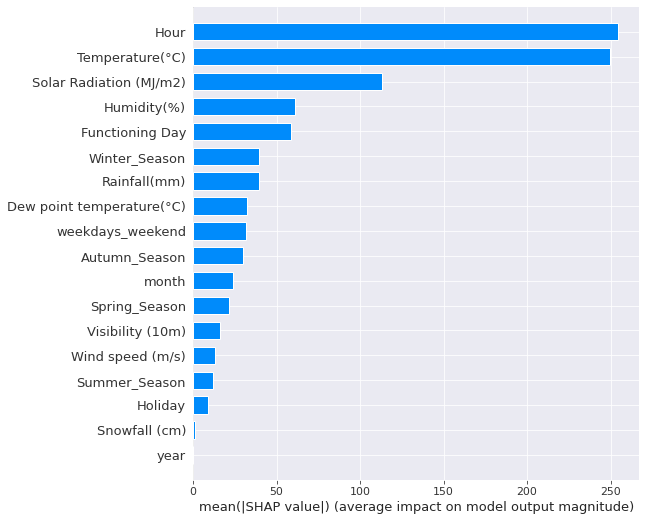

In [408]:
shap.summary_plot(shap_values, X_test, plot_type="bar",feature_names=independent_variables)

**Insights:** It is a basic insight into the model. In the following figure, you can see a comparison between feature importance calculated by SHAP values (features with large absolute Shapley values are important).



## SHAP Summary Plot 

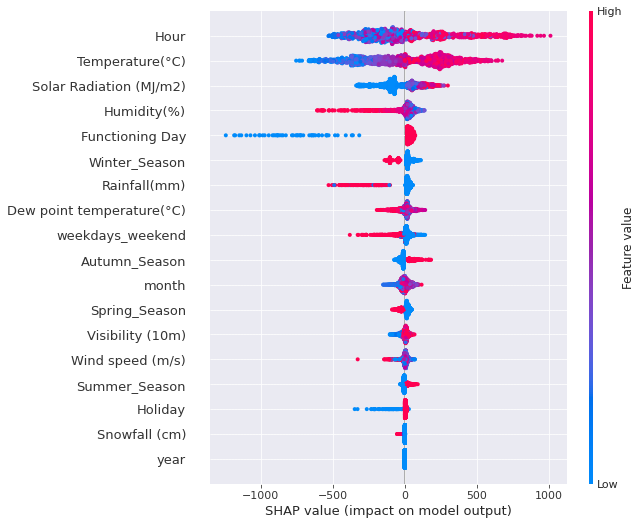

In [407]:
shap.summary_plot(shap_values, X_test,feature_names=independent_variables)

**Insights:** The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value of an instance per feature. 

You can see that the feature Hour is the most important feature, has a high Shapley value range. The color represents the value of the feature from low to high.
The features are ordered according to their importance.

##SHAP Force plot


In [410]:
#shap for lightGBM model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(lgbr_grid.best_estimator_,feature_names=independent_variables)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[2])

This plot gives us the explainability of a single model prediction. Force plot can be used for error analysis, finding the explanation to specific instance prediction.

From the plot we can see:

1. The model output value: 332.34
2. Red represents features that pushed the model score higher, and blue representing features that pushed the score lower.
3. The bigger the arrow, the bigger the impact of the feature on the output. i.e,feature Hour is impacting the most.

## ELI 5

In [379]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.5 MB/s 
     |████████████████████████████████| 133 kB 43.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=4c6c0c4473d1d043245c7a2aafba80b0c5022a6316d5a55c63b98fc8f06625a3
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [380]:
import eli5 as eli

In [381]:
for_instance=2

In [382]:
eli.show_prediction(lgbr_grid.best_estimator_, pd.DataFrame(X_test).reset_index(drop=True).loc[[for_instance]],
                    feature_names=independent_variables[:],
                    show_feature_values=True)



1.   The green color shows how much the feature contributes to the prediction of the respective class and the weights are positive for the green color.

2. The red color has negative weights that indicate the feature isn't contributing to the prediction of that class.

3. It can be observed from the above output, eli5 shows us the contribution of each feature in predicting the output.


# **Conclusion**

## Data Exploration Conclusions

In this project, we explored several types of informations that influence bike rental count. Below is a quick summary of exploratory data analysis
conclusions from above pie chart:

 **Season:** Most bikes have been rented in the summer season.least bike rent count is in winter season.autumn and spring seasons have almost equal amounts of bike rent count.

 **YearwiseRentedBikeCount:** Most of the bikes have been rented in the year 2018.

**MonthwiseRentedBikeCount in year 2018:**Very less bikes have been rented in december which is winter season.

**Intensities of Rainfall:**People tend to rent bikes when there is no or less rainfall.

**Intensities of Snowfall:**People tend to rent bikes when there is no or less snowfall.

**Temperature:** People generally prefer to bike at moderate to high temperatures. We see highest rental counts between 25 to 36 degree celcius.

**Visibility Range:** people tend to rent bikes when the visibility is between 300 to 1700.

**Working or Non-working Day:** We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count high at peak office hours (8am and 5pm) and the second for a Non-working day where rental count is more or less uniform across the day with a peak at around noon.

**Hour of the day:** Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.


#Modelling Conclusions:

We used 6 Regression Models to predict the bike rental count at any hour of the day - Linear Regression,Regularised Linear Regression(Ridge, Lasso & Elastic net), Decision Tree,Random Forest,XG Boost and LightGBM Model.

**Below is a summary of the model performances:**

Of all the models, we found a LightGBM Model providing the best/lowest RMSE score and highest R^2 score.
Hour of the day is the most important feature in the respect of all independent feature which provide highest bike rented count.
Thus, we have successfully built predictive models that can predict the demand for rental bikes based on different weather conditions and all other features. 
 If the model interpretability is important to the stakeholders, we can choose deploy the Light GBM model.


